In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hub_notifications_logs.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11468 entries, 0 to 11467
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11468 non-null  object 
 1   capstone_employee_id  10833 non-null  float64
 2   capstone_name         10833 non-null  object 
 3   capstone_email        10833 non-null  object 
 4   view_time_utc         11468 non-null  object 
 5   _rid                  11468 non-null  object 
 6   _self                 11468 non-null  object 
 7   _etag                 11468 non-null  object 
 8   _attachments          11468 non-null  object 
 9   _ts                   11468 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 896.1+ KB


In [4]:
df.rename(columns={'id': 'id_notificationlogs', 
                   'capstone_name': 'capstone_name_notificationlogs','capstone_email': 'capstone_email_notificationlogs', 
                   'capstone_employee_id': 'capstone_employee_id_notificationlogs'}, inplace=True)

**This script handles two timestamp formats: Epoch time (in milliseconds, possibly in scientific notation) and ISO 8601 datetime strings.**

In [5]:
# Function to convert epoch time to datetime
def convert_epoch_to_datetime(ts):
    try:
        # Handle scientific notation by converting to float and then to integer
        ts = float(ts)  # Convert to float
        ts = int(ts)  # Convert to integer

        # Convert milliseconds to seconds for correct datetime conversion
        return datetime.utcfromtimestamp(ts / 1000)  # Divide by 1000 to convert ms to seconds
    except Exception as e:
        return None  # If conversion fails, return NaT

# Function to convert ISO 8601 to datetime (it's already handled by pandas)
def convert_iso8601_to_datetime(ts):
    return pd.to_datetime(ts)

# Function to check for epoch format
def is_epoch_format(ts):
    try:
        float(ts)  # Try converting to float (for epoch timestamp)
        return True
    except ValueError:
        return False

def is_iso8601_format(ts):
    try:
        parsed_date = pd.to_datetime(ts, errors='coerce')  # Try converting
        return not pd.isnull(parsed_date)  # If conversion is successful, it's ISO 8601
    except Exception:
        return False

# Separate the data into epoch time and ISO 8601 timestamp
epoch_df = df[df['view_time_utc'].apply(is_epoch_format)]  # Rows with epoch time
iso8601_df = df[df['view_time_utc'].apply(is_iso8601_format)]  # Rows with ISO 8601 timestamps

# Apply the conversion only to epoch_df
epoch_df['converted_time'] = epoch_df['view_time_utc'].apply(convert_epoch_to_datetime)

# For ISO 8601 timestamps, convert using pd.to_datetime
iso8601_df['converted_time'] = iso8601_df['view_time_utc'].apply(convert_iso8601_to_datetime)

# Combine the two DataFrames back into one
df_combined = pd.concat([epoch_df, iso8601_df])

# Display the final result
print(df_combined[['view_time_utc', 'converted_time']].sort_index())

C:\Users\HOME\AppData\Local\Temp\ipykernel_4420\2272162656.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epoch_df['converted_time'] = epoch_df['view_time_utc'].apply(convert_epoch_to_datetime)


                  view_time_utc                    converted_time
0                   1.68781E+12               2023-06-26 20:06:40
1                   1.68781E+12               2023-06-26 20:06:40
2                   1.68782E+12               2023-06-26 22:53:20
3                   1.68782E+12               2023-06-26 22:53:20
4                   1.68782E+12               2023-06-26 22:53:20
...                         ...                               ...
11463  2025-01-31T16:51:30.976Z  2025-01-31 16:51:30.976000+00:00
11464  2025-01-31T17:11:38.717Z  2025-01-31 17:11:38.717000+00:00
11465  2025-01-31T17:12:54.107Z  2025-01-31 17:12:54.107000+00:00
11466  2025-02-03T18:40:21.655Z  2025-02-03 18:40:21.655000+00:00
11467  2025-02-03T18:54:00.945Z  2025-02-03 18:54:00.945000+00:00

[11468 rows x 2 columns]


C:\Users\HOME\AppData\Local\Temp\ipykernel_4420\2272162656.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iso8601_df['converted_time'] = iso8601_df['view_time_utc'].apply(convert_iso8601_to_datetime)


**This script converts mixed ISO 8601 and epoch (ms) timestamps into clean UTC datetime strings formatted as YYYY-MM-DD HH:MM:SS.**

In [6]:
# Function to clean the datetime format and remove milliseconds
def clean_datetime(ts):
    try:
        # Check if the timestamp is in ISO format
        if isinstance(ts, str) and 'T' in ts:
            # Convert the ISO 8601 timestamp to datetime and clean it (remove milliseconds)
            ts = pd.to_datetime(ts).strftime('%Y-%m-%d %H:%M:%S')  # Format to remove milliseconds
            return ts
        else:
            # Handle epoch time (milliseconds)
            ts = float(ts)  # Convert to float (in case it's in scientific notation)
            ts = int(ts)  # Convert to integer
            return datetime.utcfromtimestamp(ts / 1000).strftime('%Y-%m-%d %H:%M:%S')  # Convert to datetime and clean
    except Exception as e:
        return None  # If the conversion fails, return None

# Apply the function to the view_time_utc column
df['cleaned_time'] = df_combined['view_time_utc'].apply(clean_datetime)

# Display the cleaned DataFrame
print(df[['view_time_utc', 'cleaned_time']])

                  view_time_utc         cleaned_time
0                   1.68781E+12  2023-06-26 20:06:40
1                   1.68781E+12  2023-06-26 20:06:40
2                   1.68782E+12  2023-06-26 22:53:20
3                   1.68782E+12  2023-06-26 22:53:20
4                   1.68782E+12  2023-06-26 22:53:20
...                         ...                  ...
11463  2025-01-31T16:51:30.976Z  2025-01-31 16:51:30
11464  2025-01-31T17:11:38.717Z  2025-01-31 17:11:38
11465  2025-01-31T17:12:54.107Z  2025-01-31 17:12:54
11466  2025-02-03T18:40:21.655Z  2025-02-03 18:40:21
11467  2025-02-03T18:54:00.945Z  2025-02-03 18:54:00

[11468 rows x 2 columns]


In [7]:
df= df.dropna()
df.drop(['_rid','_self','_etag','_attachments','_ts'], axis=1, inplace=True)
df.rename(columns={'cleaned_time': 'viewtime_notificationlogs'}, inplace=True)
df = df.drop(columns=['view_time_utc'])

In [8]:
df['viewtime_notificationlogs'] = pd.to_datetime(df['viewtime_notificationlogs'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10833 entries, 1 to 11467
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id_notificationlogs                    10833 non-null  object        
 1   capstone_employee_id_notificationlogs  10833 non-null  float64       
 2   capstone_name_notificationlogs         10833 non-null  object        
 3   capstone_email_notificationlogs        10833 non-null  object        
 4   viewtime_notificationlogs              10833 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 507.8+ KB


**Monthly view counts in a time series plot**

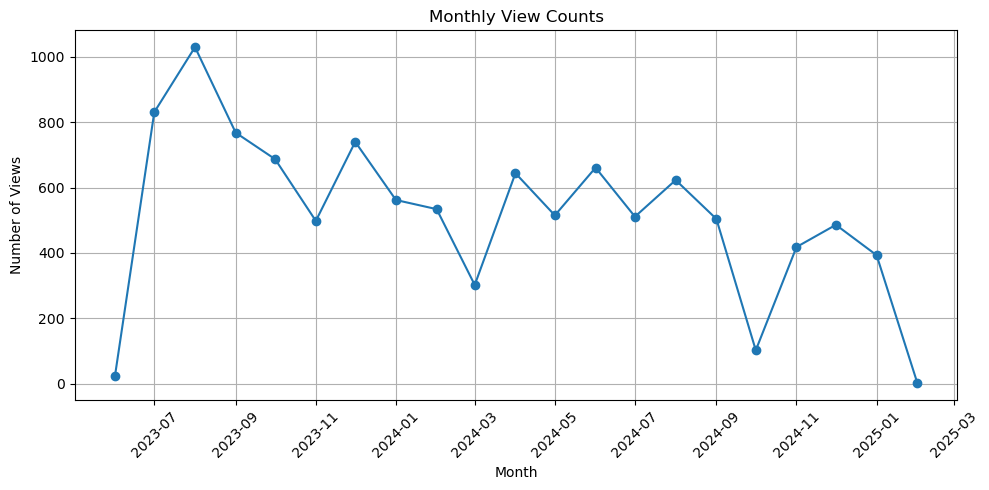

In [10]:
# Extract the month and year for grouping
df['month'] = df['viewtime_notificationlogs'].dt.to_period('M')

# Count the number of views per month
monthly_views = df.groupby('month').size().reset_index(name='view_count')

# Convert 'month' back to datetime for plotting
monthly_views['month'] = monthly_views['month'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_views['month'], monthly_views['view_count'], marker='o')
plt.title('Monthly View Counts')
plt.xlabel('Month')
plt.ylabel('Number of Views')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 10 users by view count using a bar plot to identify the most active users**

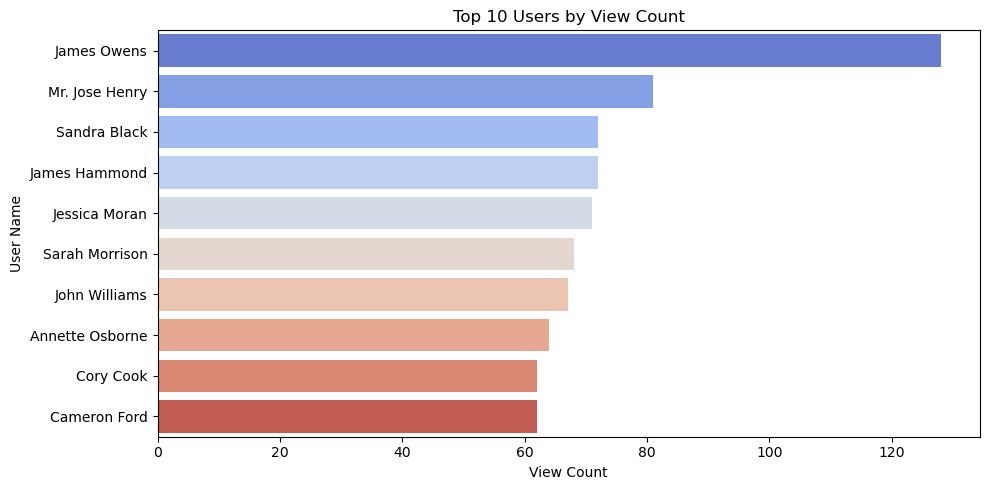

In [11]:
# Count views per user (by name)
top_users = df['capstone_name_notificationlogs'].value_counts().head(10).reset_index()
top_users.columns = ['name', 'view_count']

plt.figure(figsize=(10, 5))
sns.barplot(data=top_users, x='view_count', y='name', palette='coolwarm')
plt.title('Top 10 Users by View Count')
plt.xlabel('View Count')
plt.ylabel('User Name')
plt.tight_layout()
plt.show()

**Distribution of views by day of the week using a bar plot to understand user activity patterns throughout the week**

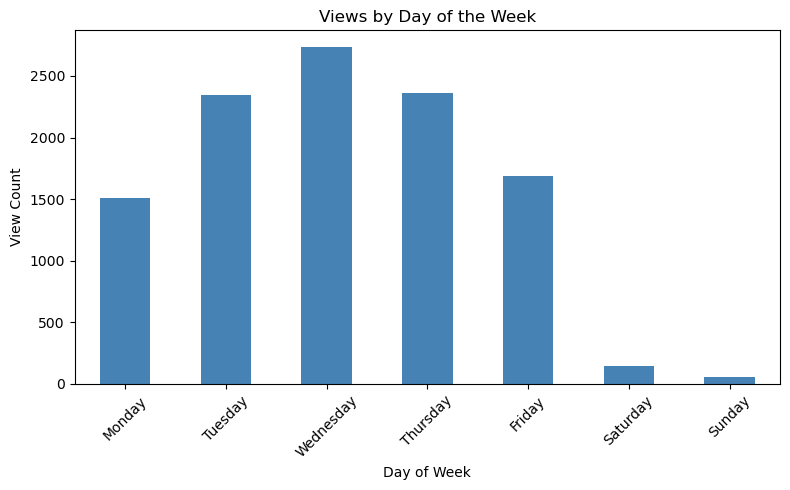

In [12]:
df['day_of_week'] = df['viewtime_notificationlogs'].dt.day_name()

views_by_day = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

views_by_day.plot(kind='bar', figsize=(8, 5), color='steelblue')
plt.title('Views by Day of the Week')
plt.ylabel('View Count')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of views by hour of the day using a bar plot to analyze user activity patterns across different times of the day**

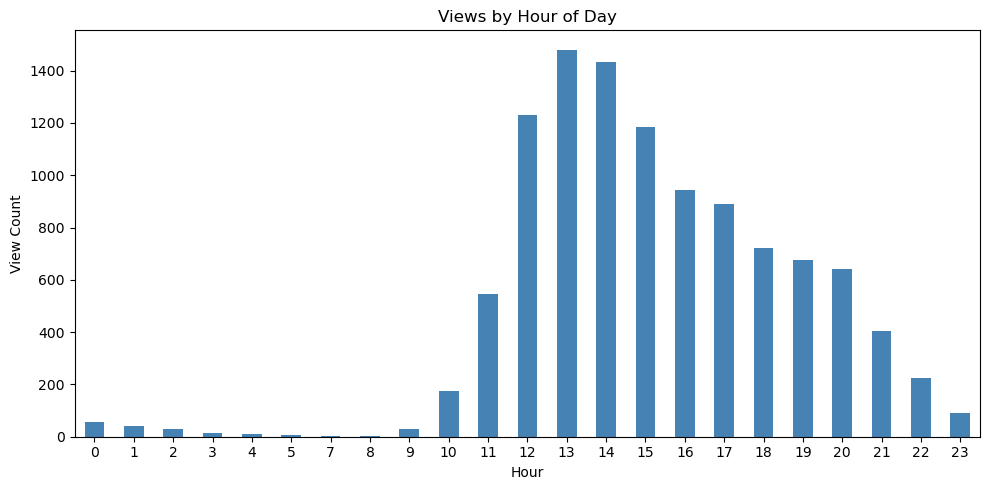

In [13]:
df['hour'] = df['viewtime_notificationlogs'].dt.hour

views_by_hour = df['hour'].value_counts().sort_index()

views_by_hour.plot(kind='bar', figsize=(10, 5), color='steelblue')
plt.title('Views by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('View Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()